In [1]:
from sklearn import svm

In [2]:
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [5]:
clf.predict([[2,2]])

array([1])

In [6]:
clf.support_

array([0, 1], dtype=int32)

In [7]:
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [8]:
clf.n_support_

array([1, 1], dtype=int32)

In [9]:
>>> from sklearn import svm
>>> X = [[0, 0], [2, 2]]
>>> y = [0.5, 2.5]
>>> regr = svm.SVR()
>>> regr.fit(X, y)

SVR()

In [10]:
regr.predict([[1, 1]])

array([1.5])

In [11]:
from sklearn.linear_model import SGDClassifier

In [14]:
>>> X = [[0., 0.], [1., 1.]]
>>> y = [0, 1]
>>> clf = SGDClassifier(loss="hinge", penalty="l2")  # , max_iter=5
>>> clf.fit(X, y)

SGDClassifier()

In [15]:
clf.predict([[2., 2.]])

array([1])

In [16]:
clf.coef_

array([[9.85221675, 9.85221675]])

In [17]:
clf.decision_function([[2., 2.]])

array([29.41883706])

In [18]:
clf.predict_proba([[1., 1.]])

AttributeError: probability estimates are not available for loss='hinge'

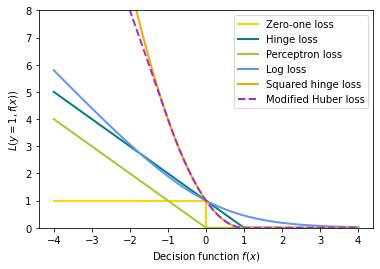

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()

In [20]:
>>> from sklearn.neighbors import NearestNeighbors
>>> import numpy as np
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
>>> distances, indices = nbrs.kneighbors(X)

In [21]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [22]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [28]:
nbrs.kneighbors_graph().toarray()

array([[0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 1., 0.]])

In [29]:
>>> from sklearn.neighbors import NearestCentroid
>>> import numpy as np
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> y = np.array([1, 1, 1, 2, 2, 2])
>>> clf = NearestCentroid()
>>> clf.fit(X, y)

NearestCentroid()

In [30]:
clf.predict([[-0.8, -1]])

array([1])

In [31]:
>>> from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
... KNeighborsClassifier)
>>> from sklearn.datasets import load_iris
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.pipeline import Pipeline
>>> X, y = load_iris(return_X_y=True)
>>> X_train, X_test, y_train, y_test = train_test_split(X, y,
... stratify=y, test_size=0.7, random_state=42)
>>> nca = NeighborhoodComponentsAnalysis(random_state=42)
>>> knn = KNeighborsClassifier(n_neighbors=3)
>>> nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
>>> nca_pipe.fit(X_train, y_train)

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [32]:
nca_pipe.score(X_test, y_test)

0.9619047619047619

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
knn.score(X_test, y_test)

0.9333333333333333

In [35]:
>>> from sklearn import tree
>>> X = [[0, 0], [1, 1]]
>>> Y = [0, 1]
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X, Y)

In [36]:
clf.predict([[2., 2.]])

array([1])

In [37]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [1]:
>>> from sklearn.datasets import load_iris
>>> from sklearn import tree
>>> X, y = load_iris(return_X_y=True)
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

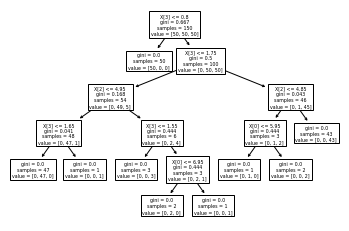

In [2]:
tree.plot_tree(clf) 

In [17]:
>>> import graphviz 
>>> dot_data = tree.export_graphviz(clf, out_file=None) 
>>> graph = graphviz.Source(dot_data) 
>>> graph.render("iris-tree-graph.dot") 

CalledProcessError: Command '['dot', '-Kdot', '-Tpdf', '-O', 'iris-tree-graph.dot']' died with <Signals.SIGKILL: 9>. [stderr: b'']

In [18]:
>>> dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=iris.feature_names,  
...                      class_names=iris.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
# >>> graph = graphviz.Source(dot_data) 
# save `dot_data` value as file "iris-tree-v2-graph.dot", then open by Graphviz.app， that's ok!!

In [7]:
iris = load_iris()

In [14]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<petal width (cm) &le; 0.8<br/>gini = 0.667<br/>samples = 150<br/>value = [50, 50, 50]<br/>class = setosa>, fillcolor="#ffffff"] ;\n1 [label=<gini = 0.0<br/>samples = 50<br/>value = [50, 0, 0]<br/>class = setosa>, fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<petal width (cm) &le; 1.75<br/>gini = 0.5<br/>samples = 100<br/>value = [0, 50, 50]<br/>class = versicolor>, fillcolor="#ffffff"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<petal length (cm) &le; 4.95<br/>gini = 0.168<br/>samples = 54<br/>value = [0, 49, 5]<br/>class = versicolor>, fillcolor="#4de88e"] ;\n2 -> 3 ;\n4 [label=<petal width (cm) &le; 1.65<br/>gini = 0.041<br/>samples = 48<br/>value = [0, 47, 1]<br/>class = versicolor>, fillcolor="#3de684"] ;\n3 -> 4 ;\n5 [label=<gini = 0.0<br/>samples = 47<br/>value =

In [19]:
>>> from sklearn.datasets import load_iris
>>> from sklearn.tree import DecisionTreeClassifier
>>> from sklearn.tree import export_text
>>> iris = load_iris()
>>> decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
>>> decision_tree = decision_tree.fit(iris.data, iris.target)
>>> r = export_text(decision_tree, feature_names=iris['feature_names'])

In [21]:
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [22]:
>>> from sklearn import tree
>>> X = [[0, 0], [2, 2]]
>>> y = [0.5, 2.5]
>>> clf = tree.DecisionTreeRegressor()
>>> clf = clf.fit(X, y)
>>> clf.predict([[1, 1]])

array([0.5])

In [23]:
>>> from sklearn.ensemble import RandomForestClassifier
>>> X = [[0, 0], [1, 1]]
>>> Y = [0, 1]
>>> clf = RandomForestClassifier(n_estimators=10)
>>> clf = clf.fit(X, Y)

In [31]:
clf.n_outputs_

1

In [32]:
>>> from sklearn.model_selection import cross_val_score
>>> from sklearn.datasets import make_blobs
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.ensemble import ExtraTreesClassifier
>>> from sklearn.tree import DecisionTreeClassifier

In [33]:
>>> X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
...     random_state=0)

In [34]:
>>> clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
...     random_state=0)
>>> scores = cross_val_score(clf, X, y, cv=5)
>>> scores.mean()

0.9823000000000001

In [35]:
>>> clf = RandomForestClassifier(n_estimators=10, max_depth=None,
...     min_samples_split=2, random_state=0)
>>> scores = cross_val_score(clf, X, y, cv=5)
>>> scores.mean()

0.9997

In [36]:
>>> clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
...     min_samples_split=2, random_state=0)
>>> scores = cross_val_score(clf, X, y, cv=5)

In [38]:
scores.mean()

1.0

In [39]:
>>> from sklearn.model_selection import cross_val_score
>>> from sklearn.datasets import load_iris
>>> from sklearn.ensemble import AdaBoostClassifier

In [41]:
>>> X, y = load_iris(return_X_y=True)
>>> clf = AdaBoostClassifier(n_estimators=100)
>>> scores = cross_val_score(clf, X, y, cv=5)
>>> scores.mean()

0.9466666666666665

In [42]:
>>> from sklearn.datasets import make_hastie_10_2
>>> from sklearn.ensemble import GradientBoostingClassifier

>>> X, y = make_hastie_10_2(random_state=0)
>>> X_train, X_test = X[:2000], X[2000:]
>>> y_train, y_test = y[:2000], y[2000:]

>>> clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(X_train, y_train)
>>> clf.score(X_test, y_test)

0.913

In [50]:
clf.feature_importances_

array([0.09198524, 0.13040289, 0.11923928, 0.08806779, 0.08713337,
       0.12007367, 0.07865914, 0.09990544, 0.09687612, 0.08765704])

In [51]:
>>> from sklearn.experimental import enable_hist_gradient_boosting
>>> from sklearn.ensemble import HistGradientBoostingClassifier
>>> from sklearn.datasets import make_hastie_10_2

>>> X, y = make_hastie_10_2(random_state=0)
>>> X_train, X_test = X[:2000], X[2000:]
>>> y_train, y_test = y[:2000], y[2000:]

>>> clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
>>> clf.score(X_test, y_test)

0.8965

In [55]:
clf.n_features_in_

10

In [78]:
>>> from sklearn import datasets
>>> from sklearn.model_selection import cross_val_score
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.ensemble import VotingClassifier

>>> iris = datasets.load_iris()
>>> X, y = iris.data[:, 1:3], iris.target

>>> clf1 = LogisticRegression(random_state=1)
>>> clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
>>> clf3 = GaussianNB()

>>> eclf = VotingClassifier(
...     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
...     voting='soft')

In [86]:
>>> from sklearn import datasets
>>> from sklearn.tree import DecisionTreeClassifier
>>> from sklearn.neighbors import KNeighborsClassifier
>>> from sklearn.svm import SVC
>>> from itertools import product
>>> from sklearn.ensemble import VotingClassifier

>>> # Loading some example data
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0, 2]]
>>> y = iris.target

>>> # Training classifiers
>>> clf1 = DecisionTreeClassifier(max_depth=4)
>>> clf2 = KNeighborsClassifier(n_neighbors=7)
>>> clf3 = SVC(kernel='rbf', probability=True)
>>> eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
...                         voting='soft', weights=[2, 1, 2])

>>> clf1 = clf1.fit(X, y)
>>> clf2 = clf2.fit(X, y)
>>> clf3 = clf3.fit(X, y)
>>> eclf = eclf.fit(X, y)

In [87]:
>>> for clf, label in zip([clf1, clf2, clf3, eclf], [type(clf1).__name__, type(clf2).__name__, type(clf3).__name__, 'Ensemble']):
...     scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
...     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.03) [DecisionTreeClassifier]
Accuracy: 0.94 (+/- 0.04) [KNeighborsClassifier]
Accuracy: 0.95 (+/- 0.03) [SVC]
Accuracy: 0.93 (+/- 0.07) [Ensemble]


In [88]:
>>> from sklearn.model_selection import GridSearchCV
>>> clf1 = LogisticRegression(random_state=1)
>>> clf2 = RandomForestClassifier(random_state=1)
>>> clf3 = GaussianNB()
>>> eclf = VotingClassifier(
...     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
...     voting='soft'
... )

>>> params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}

>>> grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
>>> grid = grid.fit(iris.data, iris.target)

/Users/mengjunliu/anaconda3/envs/ml_py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mengjunliu/anaconda3/envs/ml_py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

In [89]:
>>> eclf = VotingClassifier(
...     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
...     voting='soft'
... )

In [90]:
>>> eclf = VotingClassifier(
...     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
...     voting='soft', weights=[2,5,1]
... )

In [91]:
>>> from sklearn.datasets import load_iris
>>> from sklearn.feature_selection import SelectKBest
>>> from sklearn.feature_selection import chi2
>>> X, y = load_iris(return_X_y=True)
>>> X.shape

(150, 4)

In [92]:
>>> X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
>>> X_new.shape

(150, 2)

In [93]:
>>> from sklearn.svm import LinearSVC
>>> from sklearn.datasets import load_iris
>>> from sklearn.feature_selection import SelectFromModel
>>> X, y = load_iris(return_X_y=True)
>>> X.shape

(150, 4)

In [95]:
>>> lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
>>> model = SelectFromModel(lsvc, prefit=True)
>>> X_new = model.transform(X)
>>> X_new.shape

/Users/mengjunliu/anaconda3/envs/ml_py37/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(150, 3)

In [96]:
>>> from sklearn.ensemble import ExtraTreesClassifier

In [97]:
>>> clf = ExtraTreesClassifier(n_estimators=50)
>>> clf = clf.fit(X, y)
>>> clf.feature_importances_

array([0.10787453, 0.06759799, 0.3838371 , 0.44069038])

In [98]:
>>> model = SelectFromModel(clf, prefit=True)
>>> X_new = model.transform(X)
>>> X_new.shape               

(150, 2)

In [99]:
X_new

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [100]:
>>> from sklearn.neural_network import MLPClassifier
>>> X = [[0., 0.], [1., 1.]]
>>> y = [0, 1]
>>> clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(5, 2), random_state=1)
...
>>> clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [101]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [102]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [103]:
clf.predict_proba([[2., 2.], [1., 2.]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

In [104]:
>>> X = [[0., 0.], [1., 1.]]
>>> y = [[0, 1], [1, 1]]
>>> clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(15,), random_state=1)
...
>>> clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [106]:
clf.predict_proba([[1., 2.]])

array([[0.99999999, 1.        ]])

In [108]:
>>> from sklearn import svm, datasets
>>> from sklearn.model_selection import cross_val_score
>>> X, y = datasets.load_iris(return_X_y=True)
>>> clf = svm.SVC(random_state=0)
>>> cross_val_score(clf, X, y, cv=5, scoring='recall_macro')

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [109]:
>>> from sklearn.metrics import fbeta_score, make_scorer
>>> ftwo_scorer = make_scorer(fbeta_score, beta=2)
>>> from sklearn.model_selection import GridSearchCV
>>> from sklearn.svm import LinearSVC
>>> grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]},
...                     scoring=ftwo_scorer, cv=5)

In [110]:
>>> import numpy as np
>>> def my_custom_loss_func(y_true, y_pred):
...     diff = np.abs(y_true - y_pred).max()
...     return np.log1p(diff)
...
>>> # score will negate the return value of my_custom_loss_func,
>>> # which will be np.log(2), 0.693, given the values for X
>>> # and y defined below.
>>> score = make_scorer(my_custom_loss_func, greater_is_better=False)
>>> X = [[1], [1]]
>>> y = [0, 1]
>>> from sklearn.dummy import DummyClassifier
>>> clf = DummyClassifier(strategy='most_frequent', random_state=0)
>>> clf = clf.fit(X, y)
>>> my_custom_loss_func(y, clf.predict(X))

0.6931471805599453

In [111]:
score(clf, X, y)

-0.6931471805599453

In [112]:
>>> from sklearn.metrics import accuracy_score
>>> from sklearn.metrics import make_scorer
>>> scoring = {'accuracy': make_scorer(accuracy_score),
...            'prec': 'precision'}

In [113]:
>>> from sklearn.model_selection import cross_validate
>>> from sklearn.metrics import confusion_matrix
>>> # A sample toy binary classification dataset
>>> X, y = datasets.make_classification(n_classes=2, random_state=0)
>>> svm = LinearSVC(random_state=0)
>>> def confusion_matrix_scorer(clf, X, y):
...      y_pred = clf.predict(X)
...      cm = confusion_matrix(y, y_pred)
...      return {'tn': cm[0, 0], 'fp': cm[0, 1],
...              'fn': cm[1, 0], 'tp': cm[1, 1]}
>>> cv_results = cross_validate(svm, X, y, cv=5,
...                             scoring=confusion_matrix_scorer)

In [114]:
cv_results

{'fit_time': array([0.002666  , 0.00272417, 0.00178909, 0.00184393, 0.00227523]),
 'score_time': array([0.00237107, 0.00075293, 0.00105095, 0.00093794, 0.00201392]),
 'test_tn': array([ 5,  9,  8,  6, 10]),
 'test_fp': array([5, 1, 2, 4, 0]),
 'test_fn': array([0, 1, 2, 3, 2]),
 'test_tp': array([10,  9,  8,  7,  8])}

In [119]:
>>> from sklearn.metrics import classification_report
>>> y_true = [0, 1, 2, 2, 0]
>>> y_pred = [0, 0, 2, 1, 0]
>>> target_names = ['class 0', 'class 1', 'class 2']
>>> print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



In [120]:
>>> from sklearn import metrics
>>> y_pred = [0, 1, 0, 0]
>>> y_true = [0, 1, 0, 1]

In [121]:
metrics.precision_score(y_true, y_pred)

1.0

In [122]:
metrics.recall_score(y_true, y_pred)

0.5

In [123]:
metrics.f1_score(y_true, y_pred)

0.6666666666666666

In [124]:
metrics.fbeta_score(y_true, y_pred, beta=0.5)

0.8333333333333334

In [126]:
metrics.fbeta_score(y_true, y_pred, beta=1)

0.6666666666666666

In [127]:
metrics.fbeta_score(y_true, y_pred, beta=2)

0.5555555555555556

In [129]:
metrics.precision_recall_fscore_support(y_true, y_pred, beta=1)

(array([0.66666667, 1.        ]),
 array([1. , 0.5]),
 array([0.8       , 0.66666667]),
 array([2, 2]))

In [130]:
>>> import numpy as np
>>> from sklearn.metrics import precision_recall_curve
>>> from sklearn.metrics import average_precision_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> precision, recall, threshold = precision_recall_curve(y_true, y_scores)

In [131]:
precision, recall, threshold

(array([0.66666667, 0.5       , 1.        , 1.        ]),
 array([1. , 0.5, 0.5, 0. ]),
 array([0.35, 0.4 , 0.8 ]))

In [132]:
>>> from sklearn import metrics
>>> y_true = [0, 1, 2, 0, 1, 2]
>>> y_pred = [0, 2, 1, 0, 0, 1]

In [133]:
metrics.precision_score(y_true, y_pred, average='macro')

0.2222222222222222

In [134]:
metrics.recall_score(y_true, y_pred, average='micro')

0.3333333333333333

In [135]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.26666666666666666

In [136]:
metrics.fbeta_score(y_true, y_pred, average='macro', beta=0.5)

0.23809523809523805

In [137]:
metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5, average=None)

(array([0.66666667, 0.        , 0.        ]),
 array([1., 0., 0.]),
 array([0.71428571, 0.        , 0.        ]),
 array([2, 2, 2]))

In [138]:
metrics.recall_score(y_true, y_pred, labels=[1, 2], average='micro')

0.0

In [139]:
>>> from sklearn.metrics import explained_variance_score
>>> y_true = [3, -0.5, 2, 7]
>>> y_pred = [2.5, 0.0, 2, 8]
>>> explained_variance_score(y_true, y_pred)

0.9571734475374732

In [140]:
>>> y_true = [[0.5, 1], [-1, 1], [7, -6]]
>>> y_pred = [[0, 2], [-1, 2], [8, -5]]
>>> explained_variance_score(y_true, y_pred, multioutput='raw_values')

array([0.96774194, 1.        ])

In [141]:
explained_variance_score(y_true, y_pred, multioutput=[0.3, 0.7])

0.9903225806451612

In [142]:
>>> from sklearn.metrics import mean_absolute_error
>>> y_true = [3, -0.5, 2, 7]
>>> y_pred = [2.5, 0.0, 2, 8]
>>> mean_absolute_error(y_true, y_pred)

0.5

In [143]:
>>> y_true = [[0.5, 1], [-1, 1], [7, -6]]
>>> y_pred = [[0, 2], [-1, 2], [8, -5]]
>>> mean_absolute_error(y_true, y_pred)

0.75

In [144]:
>>> mean_absolute_error(y_true, y_pred, multioutput='raw_values')

array([0.5, 1. ])

In [145]:
mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.85

In [146]:
from sklearn.metrics import max_error

In [147]:
>>> y_true = [3, -0.5, 2, 7]
>>> y_pred = [2.5, 0.0, 2, 8]

In [148]:
max_error(y_true, y_pred)

1.0

In [149]:
>>> from sklearn.metrics import mean_squared_error
>>> y_true = [3, -0.5, 2, 7]
>>> y_pred = [2.5, 0.0, 2, 8]
>>> mean_squared_error(y_true, y_pred)

0.375

In [150]:
>>> y_true = [[0.5, 1], [-1, 1], [7, -6]]
>>> y_pred = [[0, 2], [-1, 2], [8, -5]]
>>> mean_squared_error(y_true, y_pred)

0.7083333333333334

In [151]:
>>> from sklearn.datasets import load_iris
>>> from sklearn.model_selection import train_test_split
>>> X, y = load_iris(return_X_y=True)
>>> y[y != 1] = -1
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [152]:
>>> from sklearn.dummy import DummyClassifier
>>> from sklearn.svm import SVC
>>> clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
>>> clf.score(X_test, y_test)

0.631578947368421

In [153]:
>>> clf = DummyClassifier(strategy='most_frequent', random_state=0)
>>> clf.fit(X_train, y_train)

DummyClassifier(random_state=0, strategy='most_frequent')

In [154]:
clf.score(X_test, y_test)

0.5789473684210527

In [155]:
>>> clf = SVC(kernel='rbf', C=1).fit(X_train, y_train)
>>> clf.score(X_test, y_test)

0.9473684210526315

In [1]:
>>> import numpy as np
>>> from sklearn.model_selection import validation_curve
>>> from sklearn.datasets import load_iris
>>> from sklearn.linear_model import Ridge

In [2]:
>>> np.random.seed(0)
>>> X, y = load_iris(return_X_y=True)
>>> indices = np.arange(y.shape[0])
>>> np.random.shuffle(indices)
>>> X, y = X[indices], y[indices]

In [3]:
>>> train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha",
...                                               np.logspace(-7, 3, 3),
...                                               cv=5)

/Users/mengjunliu/anaconda3/envs/ml_py37/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass param_name=alpha, param_range=[1.e-07 1.e-02 1.e+03] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [4]:
train_scores

array([[0.93402178, 0.94366418, 0.92648383, 0.91933313, 0.92922507],
       [0.9340217 , 0.94366412, 0.92648377, 0.91933304, 0.929225  ],
       [0.51143526, 0.52415737, 0.49868907, 0.47086988, 0.49623503]])

In [5]:
valid_scores

array([[0.9055033 , 0.84185935, 0.94569793, 0.96231017, 0.93366144],
       [0.90550088, 0.84184574, 0.94568969, 0.96233172, 0.93366806],
       [0.46706558, 0.25698974, 0.50496293, 0.49826404, 0.52500014]])

In [6]:
np.logspace(-7, 3, 3)

array([1.e-07, 1.e-02, 1.e+03])

In [7]:
>>> from sklearn.model_selection import learning_curve
>>> from sklearn.svm import SVC

>>> train_sizes, train_scores, valid_scores = learning_curve(
...     SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)
>>> train_sizes

array([ 50,  80, 110])

In [8]:
train_scores

array([[0.98      , 0.98      , 0.98      , 0.98      , 0.98      ],
       [0.9875    , 1.        , 0.9875    , 0.9875    , 0.9875    ],
       [0.98181818, 1.        , 0.98181818, 0.98181818, 0.99090909]])

In [9]:
valid_scores

array([[1.        , 0.93333333, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667]])